# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Curso_DA/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.") #to print the number of rows and columns using the shape function

There are 1898 rows and 9 columns.


#### Observations:
There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   There are 5 numerical columns and 4 object-type columns in the data.
*   Rating is being read as an object type column. It should be a numerical column.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df['rating'].unique() #checking wich are the non-repetitive values

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
df['rating'].apply(type).value_counts() #checking the data types in the rating column

<class 'str'>    1898
Name: rating, dtype: int64

In [ ]:
df['rating'] = df['rating'].replace(['Not given'],np.nan) # replacing missing values with nan
df['rating'] = df['rating'].astype(float) # changing the data from object to numerical column
df.info() # rechecking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
df.isnull().sum() #checking the sum of missing values

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:


*   There are 736 missing values in the rating column.
*   None of the other columns have missing values.






### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to restrict the float value to 2 decimal places
df.describe().T # to describe the numerical data

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

*   The minimum food preparation time is 20 minutes, the average is 27 minutes, and the maximum is 35 minutes.
*   The data in the rating column ranges from 3 to 5. There is not a single occurrence of 1 or 2 (although there are a lot of missing values).




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
null_rt = df.isnull().sum()['rating'] #to get the missing values of this specific column
print(null_rt)
#to get the portion of null values in the data set
null_rt * 100 / len(df)

736


38.77766069546892

#### Observations:


*   736 orders were not rated, aka missing values (39% of all the data set).



In [ ]:
df.loc[df['rating'].isnull()==True]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,NaN,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,NaN,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,NaN,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,NaN,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,NaN,31,24


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### **Categorical variable analysys**

In [ ]:
cat_cols = ["restaurant_name",	"cuisine_type", "day_of_the_week"] #list of categorical columns

for column in cat_cols:                           #checking the percentage of unique categorical values
  print(df[column].value_counts(normalize=True))
  print("-" * 50)

Shake Shack                 0.12
The Meatball Shop           0.07
Blue Ribbon Sushi           0.06
Blue Ribbon Fried Chicken   0.05
Parm                        0.04
                            ... 
Sushi Choshi                0.00
Dos Caminos Soho            0.00
La Follia                   0.00
Philippe Chow               0.00
'wichcraft                  0.00
Name: restaurant_name, Length: 178, dtype: float64
--------------------------------------------------
American         0.31
Japanese         0.25
Italian          0.16
Chinese          0.11
Mexican          0.04
Indian           0.04
Middle Eastern   0.03
Mediterranean    0.02
Thai             0.01
French           0.01
Southern         0.01
Korean           0.01
Spanish          0.01
Vietnamese       0.00
Name: cuisine_type, dtype: float64
--------------------------------------------------
Weekend   0.71
Weekday   0.29
Name: day_of_the_week, dtype: float64
--------------------------------------------------


<function matplotlib.pyplot.show>

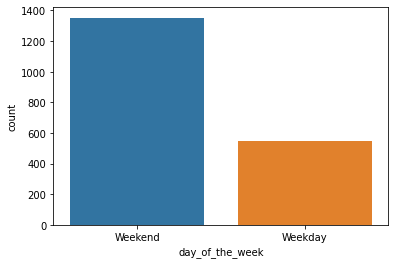

In [ ]:
sns.countplot(data=df, x='day_of_the_week') #to compare the number of orders on weekdays and weekend
plt.show

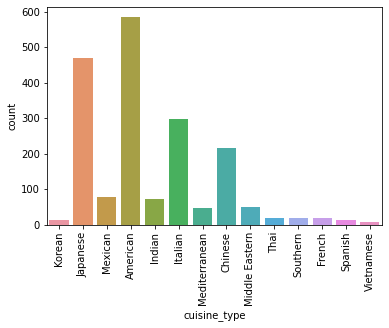

In [ ]:
sns.countplot(data=df,x='cuisine_type') #to visualize the distribution by type of cuisine
plt.xticks(rotation=90)
plt.show()



*   American cuisine has the most significant number of orders (31%), followed by Japanese cuisine (25%), Italian (16%), and Chinese (11%).
*   Other cuisines only amount to 4% or less.
*   Shake Shak restaurant is the biggest name on FoodHub, with 12% of all orders. This percentage is a significant portion of a market of 178 restaurants.
*   Weekends are the busy days for FoodHub. More than two-thirds (71%) of all orders came on Saturday and Sunday.




### Frequency of purchase analysys

In [ ]:
#the frequency display for order_id is very messy in a graph 
#but it was useful to visualize a lot of one-timer customers
#I will try some code to group the frequencies
#to count the actual numbers for the frequency of purchase by client

ten = 0 #to create 4 categories and a starting point to make the count
six = 0
two = 0
one =0
for i in df.value_counts('customer_id'): #to make the count
  if i > 9:
    ten = ten + 1
  elif i > 5:
    six = six + 1
  elif i > 1:
    two = two + 1
  else:
    one = one + 1

tot_cust= ten + six + two + one
tot_cust_pc = one * 100 / tot_cust
two_pc= two * 100 / tot_cust

print(ten, "is the number of customers having used FoodHub 10 times or more")
print(six, "is the number of customers having used FoodHub between 6 and 9 times")
print(two, "is the number of customers having used FoodHub between 2 and 5 times",'(',two_pc,'%',')')
print(one, "costumers used FoodHub just once", '(',tot_cust_pc,'%',')')
print(tot_cust, "is the total number of clients in the database")


2 is the number of customers having used FoodHub 10 times or more
12 is the number of customers having used FoodHub between 6 and 9 times
402 is the number of customers having used FoodHub between 2 and 5 times ( 33.5 % )
784 costumers used FoodHub just once ( 65.33333333333333 % )
1200 is the total number of clients in the database




*   The highest number (784) of clients have used FoodHub only once (65%). 
*   Around a third of all clients had used FoodHub at least 4 times (33%). 



### Cost of the order analysys

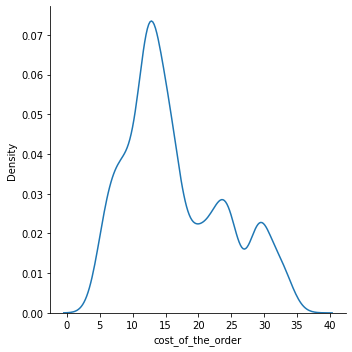

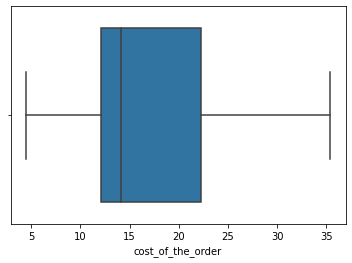

In [ ]:
sns.displot(data=df,x=df ['cost_of_the_order'], kind='kde') #to visualize the cost distribution
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

*   The cost of the order is slightly right-skewed. 
*   The cost of 50% of the orders was around 12 and 22 USD.
*   The cost of the orders range between 5 and 35 USD.
*   There are no outliers.







### Rating analysys

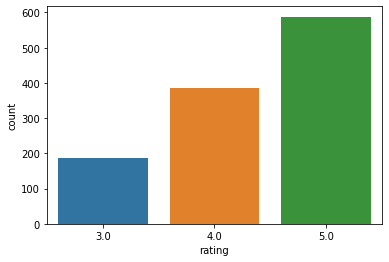

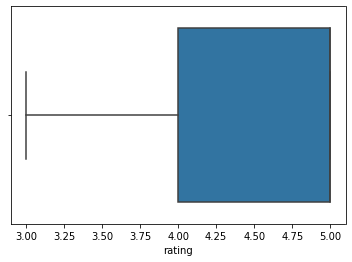

In [ ]:
#to visualize the count in ratings
sns.countplot(data=df,x='rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.show()



*   All the ratings range from regular (3) to excellent (5).
*   Around half of the ratings are excellent (5).
*   Data is left-skewed on ratings.



### Food preparation time analysys

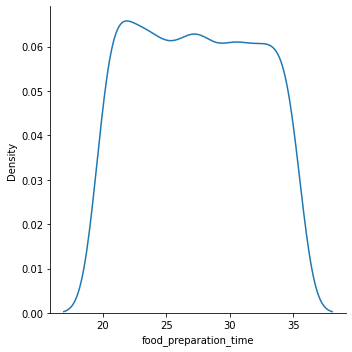

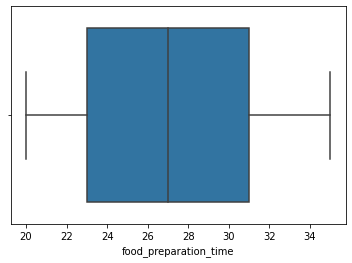

In [ ]:
#to visualize the preparation time distribution
sns.displot(data=df,x=df ['food_preparation_time'], kind = 'kde') 
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()


*   The time of food preparation is evenly distributed.  
*   This variable ranges from 20 to 35 minutes.




### Delivery Time Analysys

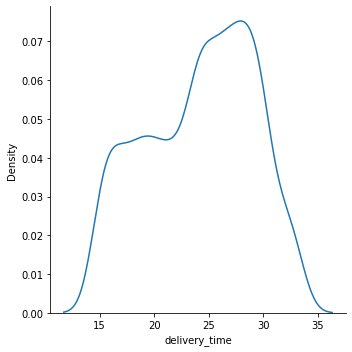

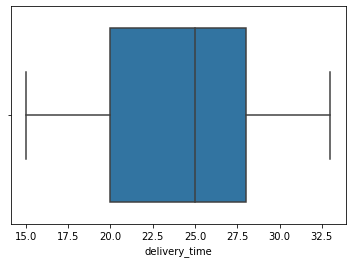

In [ ]:
#to visualize the delivery time distribution
sns.displot(data=df,x=df ['delivery_time'], kind='kde')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()



*   Delivery time is slightly left-skewed. 
*   Time ranges from 15 to 33 minutes. 



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
print(df.value_counts('restaurant_name')) #to check the number of orders per restaurant

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Length: 178, dtype: int64


#### Observations:
Top five restaurants are:


1.   Shake Shack, with                  219 orders
2.   The Meatball Shop, with            132
3.   Blue Ribbon Sushi, with            119
4.   Blue Ribbon Fried Chicken, with     96
5.   Parm, with                          68




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

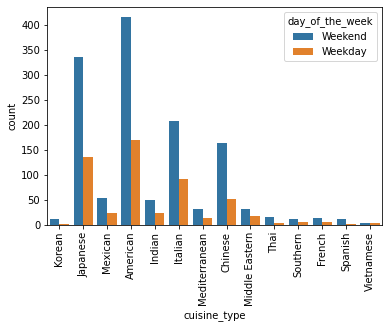

In [ ]:
#to visualize cuisines popularity by day of the week
sns.countplot(data=df,x='cuisine_type', hue= "day_of_the_week")
plt.xticks(rotation=90)
plt.show()

#### Observations:


*   American cuisine is the most popular during weekends.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
plus20 = df.loc[df['cost_of_the_order']>20] #to find entries with a cost of the order bigger than 20 USD
plus20_percent = len(plus20)/len(df['cost_of_the_order'])*100 #to calculate the percentage dividing the entries > 20 USD by the total of entries * 100
print(plus20_percent)

29.24130663856691


#### Observations:


*   29% of the orders cost more than 20 USD.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean() #to calculate the mean delivery time

24.161749209694417

#### Observations:


*   The order delivery time is 24 minutes. 



### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
print(df.value_counts('customer_id')) #to check the frequency of purchase by client

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Length: 1200, dtype: int64


#### Observations:
The 5 most frequent customers are:


1.   52832 with **13** purchases
2.   47440 with **10**
2.   83287 with **9**
2.   250494 with **8**
2.   65009 with **7**



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Correlation analysys

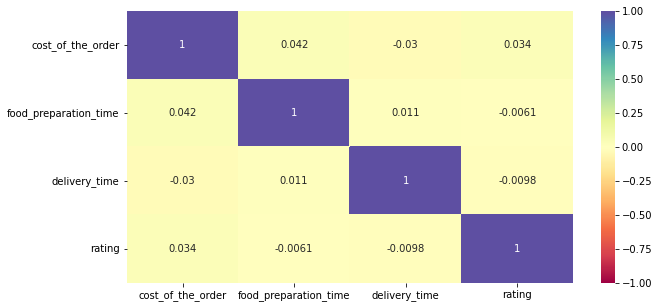

In [ ]:
#to group relevant numerical columns into one variable
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating'] 
corr = df[num_var].corr() #to create a variable to simplify map code
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()



*   There is no correlation -nor positive nor negative- between any numerical variables. 


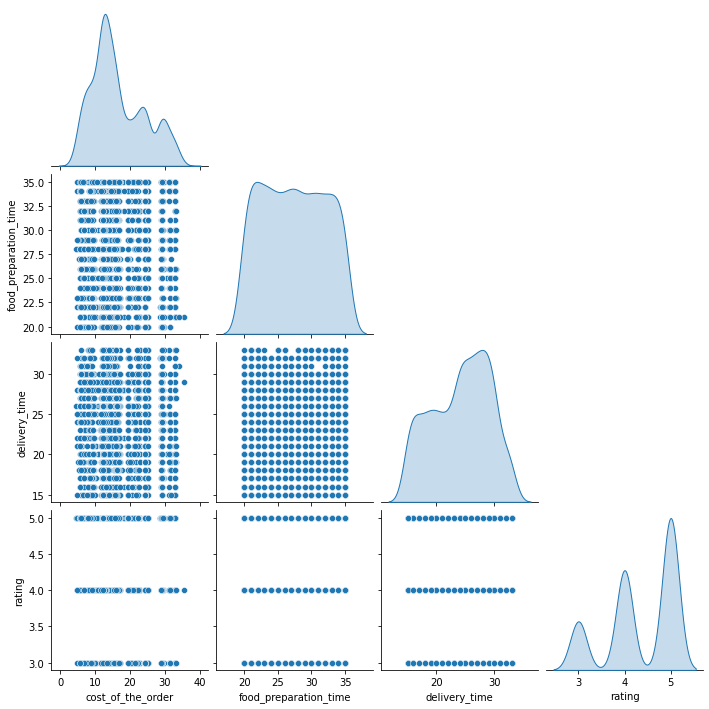

In [ ]:
sns.pairplot(data=df[num_var], diag_kind="kde", corner = True) #to doublecheck for correlations
plt.show()



*   There is no relationship pattern between the cost of the order, food preparation time, and delivery time.



### Cost of the order and categorical values

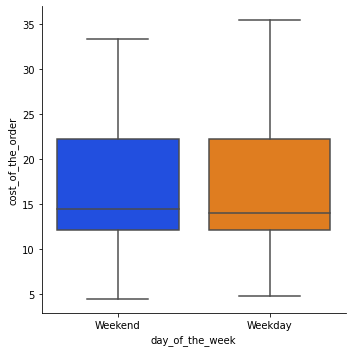

In [ ]:
sns.catplot(data=df, x='day_of_the_week', y="cost_of_the_order", kind='box', palette='bright')



*   Distribution in cost of the order is very similar on weekdays and weekends.



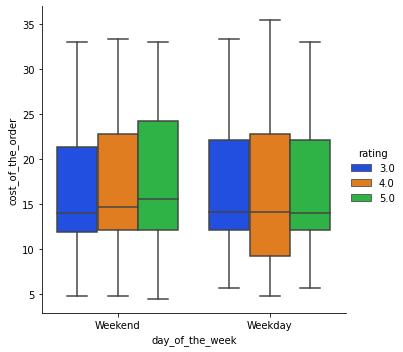

In [ ]:
sns.catplot(data=df, x='day_of_the_week', y="cost_of_the_order", hue= "rating", kind='box', palette='bright')



*   There is no notable change in the relationship between rating and cost of the order variables when sorted by day of the week.

> Bloque con sangría





(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

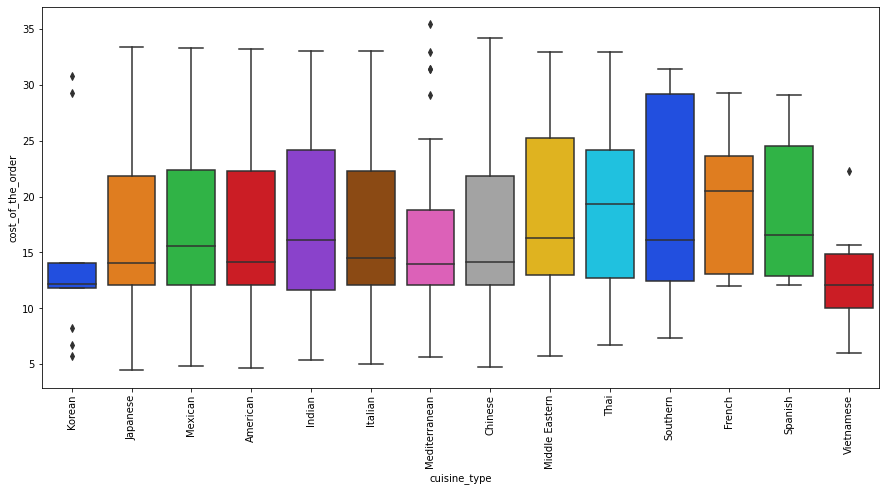

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette="bright");
plt.xticks(rotation=90)



*   American, Japanese, Italian, and Chinese cuisines are the most popular in FoodHub, but most of their orders are below the 20 USD margin.
*   Chinese cuisine has the most extensive range of costs of orders.
*   Southern cuisine has the most significant portion of orders above 20 USD among other cuisines.
*   The orders for Korean cuisine have the shortest range of costs, and almost all of them were below 15 USD.
*   French and Spanish cuisines have a similar range of order costs, but French cuisine has a more considerable portion of orders above 20 USD.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#to create a data frame sorted by top ratings with sum and average columns
top_rest = df.groupby('restaurant_name', as_index = False)['rating'].agg(['sum','mean']) 
print(top_rest)


                   sum  mean
restaurant_name             
'wichcraft        5.00  5.00
12 Chairs         9.00  4.50
5 Napkin Burger   8.00  4.00
67 Burger         5.00  5.00
Alidoro           0.00   NaN
...                ...   ...
Zero Otto Nove    4.00  4.00
brgr              3.00  3.00
da Umberto        5.00  5.00
ilili Restaurant 54.00  4.15
indikitch         9.00  4.50

[178 rows x 2 columns]


In [ ]:
#to find restaurants that comply with  conditions stated
top_rest.loc[(top_rest['mean']>4) & (top_rest['sum']> 50)]

,sum,mean
restaurant_name,,
Bareburger,69.00,4.06
Blue Ribbon Fried Chicken,277.00,4.33
Blue Ribbon Sushi,308.00,4.22
Blue Ribbon Sushi Bar & Grill,101.00,4.59
Blue Ribbon Sushi Izakaya,78.00,4.33
Cafe Mogador,54.00,4.15
Chipotle Mexican Grill $1.99 Delivery,63.00,4.20
Five Guys Burgers and Fries,82.00,4.56
Han Dynasty,102.00,4.43


#### Observations:



*   These are the 25 restaurants that both had more than a 4 rating average and more than 50 points of the total rating.






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#to calculate the sum of all earnings by range of cost of the orders
twentyfive_pc = 0 #counter variable for 25%
fifteen_pc = 0 #counter variable for 15%
for i in df['cost_of_the_order']: #to calculate perecentages on each range of cost of the order
  if i > 20:
    i = i*0.25
    twentyfive_pc = twentyfive_pc + i
  elif i > 5:
    i = i*0.15
    fifteen_pc = fifteen_pc + i
  else:
    i = 0

print(twentyfive_pc) #to show earnings from orders above 20 USD   
print(fifteen_pc) # to show earnings from orders above 5 USD
tot_earn = twentyfive_pc + fifteen_pc 
print(tot_earn)  #to show total earnings


3688.7275000000027
2477.5755000000036
6166.303000000006


In [ ]:
#additional calculation
#to calculate the total earnings provided by top performer Shake Shack
shake_shack = df.loc[df['restaurant_name']=='Shake Shack']
twentyfive_ss = 0 #counter variable for 25%
fifteen_ss = 0 #counter variable for 15%
for i in shake_shack['cost_of_the_order']: #to calculate the earnings generated through Shake Shak
  if i > 20:
    i = i*0.25
    twentyfive_ss = twentyfive_ss + i
  elif i > 5:
    i = i*0.15
    fifteen_ss = fifteen_ss + i
  else:
    i = 0
print(twentyfive_ss) #to show earnings from orders above 20 USD   
print(fifteen_ss) # to show earnings from orders above 5 USD
ss_total = twentyfive_ss + fifteen_ss 
print(ss_total)  #to show total earnings from Shake Shack

420.27499999999986
283.33200000000016
703.607


In [ ]:
#to calculate the portion of the earnings provided by top performer Shake Shack
print(ss_total * 100 / tot_earn)

11.410516155304066


#### Observations:


*   Net revenue for FoodHub is 6169.22 USD.
*   FoodHub relays heavily on its relationship with Shake Shack: 11% of all earnings come from this restaurant. 




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#to single out all orders with a total time bigger than 60 minutes
plus_sixty = df.loc[(df['food_preparation_time']) + (df['delivery_time'])>60]
#to calculate its percentage against all the dataset
print(len(plus_sixty) * 100 / len(df))

10.53740779768177


#### Observations:


*   10.53% of orders took more than 60 minutes to deliver after registration by the client.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#to estimate the mean delivery time by day of the week category
df.groupby(['day_of_the_week'])[['delivery_time']].mean() 

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


#### Observations:


*   The delivery time decreases by 6 minutes on average on weekends. 



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
 
*   FoodHub has a considerable rate of non-response to its rating requests: 39% of all orders.
*   American cuisine has the most significant number of orders (31%), followed by Japanese cuisine (25%), Italian (16%), and Chinese (11%).
*   Other cuisines only amount to 4% or less of all orders.
*   29% of the orders cost more than 20 USD, and the 4 top performer cuisines also show this overall trend.
*   Shake Shak restaurant is the biggest name on FoodHub, with 12% of all orders. This percentage is a hefty share in a market of 178 restaurants.
*   FoodHub relays heavily on its relationship with Shake Shack: 11% of all earnings come from this single restaurant.
*   Weekends are the busy days for FoodHub. More than two-thirds (71%) of all orders came on Saturday and Sunday.
*   65% of clients are one-timers in FoodHub.
Around a third of all clients have used FoodHub at least four times (32%).
*   There is no notable correlation between the cost of the order, time of delivery, preparation time, and ratings.



### Recommendations:

*  FoodHub can explore the possibility of improving its app nudge system to prompt more clients to rate their experience. 
*  The company could put promotions in place (for instance, family packs) for top-performer cuisines to push a more significant portion of the orders above the 20 USD cap.
*  FoodHub can explore putting in place a loyalty program to attract customers more than once. 
*  The company should find strategies to balance its app's top-performer restaurants' market share. The partnership with Shake Shake is good business for FoodHub, but executives should be alert about the significant reliance of FoodHub on a single restaurant. 

---